# Easy explain CAM for Image models: Use as a package

### Import libraries

In [5]:
import warnings 
warnings.filterwarnings('ignore')

import sys
import os

from torchvision.models import resnet50, vgg19
from torchvision.io.image import read_image

# Set up paths
module_path = os.path.abspath(os.path.join("../../"))
if module_path not in sys.path:
    sys.path.append(module_path)

from easy_explain import CAMExplain

Let's load our models. We will use two examples one with a vgg19 and one with resnet50

In [6]:
resnet50_model = resnet50(weights="ResNet50_Weights.DEFAULT").eval()
vgg19_model = vgg19(weights="VGG19_Weights.DEFAULT").eval()

Also a transformation parameters dictionary

In [8]:
trans_params = {"ImageNet_transformation":
  {"Resize": {"h": 224,"w": 224},
  "Normalize": {"mean": [0.485, 0.456, 0.406], "std": [0.229, 0.224, 0.225]}}}

Let's get our image. It will be an example image downloaded from [Unsplash](https://unsplash.com/photos/giraffe-surrounded-by-brown-grass-pf97TYdQlWM)

In [14]:
img = read_image("../data/mike-setchell-pf97TYdQlWM-unsplash.jpg")

Creation of the explainer based on the CAMExplain Class for the resnet model

In [19]:
explainer = CAMExplain(model = resnet50_model) 

Basic transformations for the image based on our easy explain class

In [20]:
input_tensor = explainer.transform_image(img, trans_params["ImageNet_transformation"])

Let's visualise for this model some of our preference layers

INFO:root:The cams per target layer are: [torch.Size([1, 7, 7])]


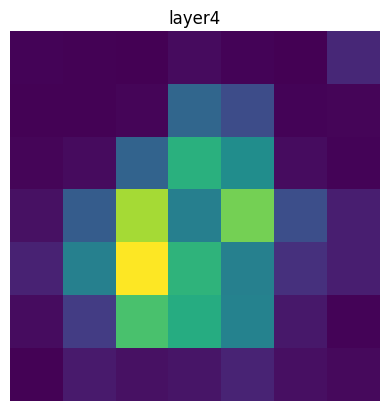

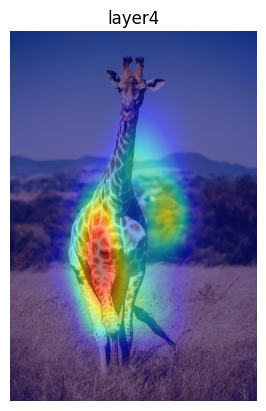

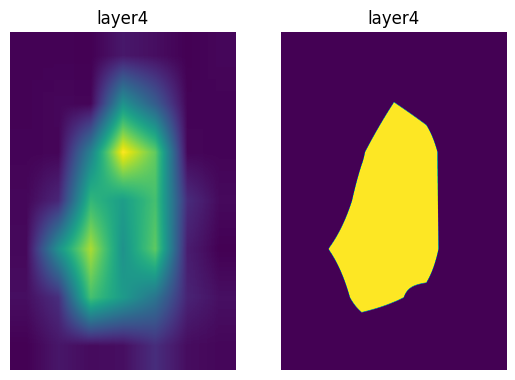

INFO:root:Successfully retrieved CAMs for multiple layers
INFO:root:The cams per target layer are: [torch.Size([1, 28, 28]), torch.Size([1, 14, 14]), torch.Size([1, 7, 7])]


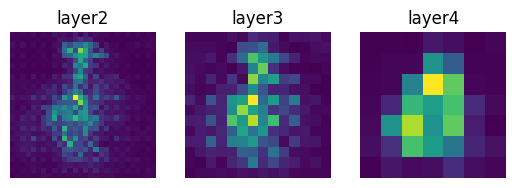

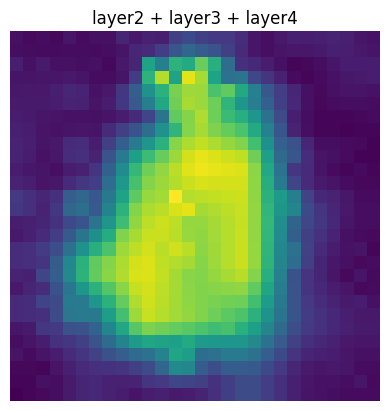

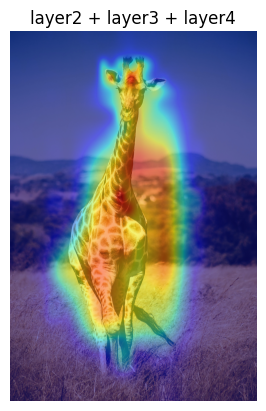

In [21]:
explainer.generate_explanation(img, input_tensor, multiple_layers=["layer2", "layer3", "layer4"])

Now let's use another model (vgg model)

In [15]:
explainer = CAMExplain(model = vgg19_model)

Basic transformations for the image based on our easy explain class


In [16]:
input_tensor = explainer.transform_image(img, trans_params["ImageNet_transformation"])

Let's visualise for this model all the layers with features

INFO:root:The cams per target layer are: [torch.Size([1, 224, 224]), torch.Size([1, 224, 224]), torch.Size([1, 224, 224]), torch.Size([1, 224, 224]), torch.Size([1, 112, 112]), torch.Size([1, 112, 112]), torch.Size([1, 112, 112]), torch.Size([1, 112, 112]), torch.Size([1, 112, 112]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 14, 14]), torch.Size([1, 14, 14]), torch.Size([1, 14, 14]), torch.Size([1, 14, 14]), torch.Size([1, 14, 14]), torch.Size([1, 14, 14]), torch.Size([1, 14, 14]), torch.Size([1, 14, 14])]


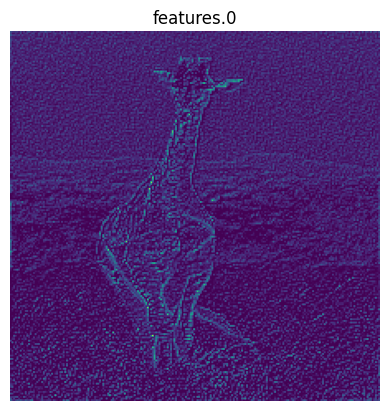

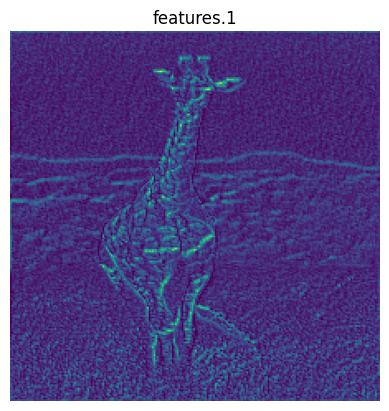

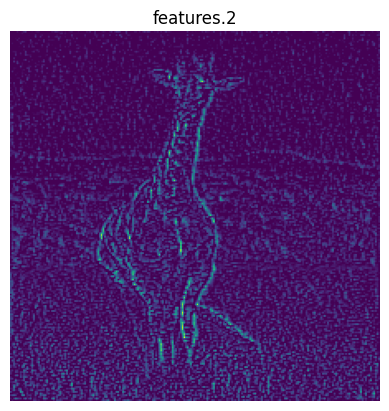

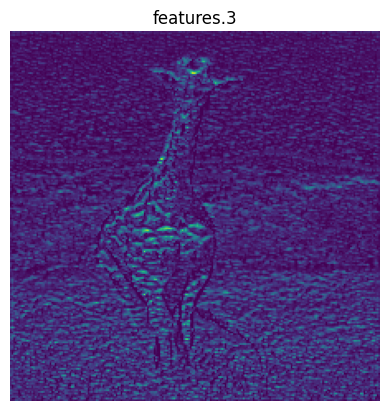

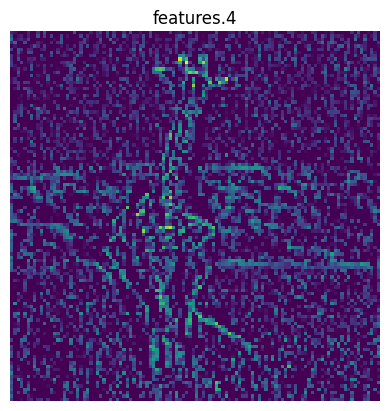

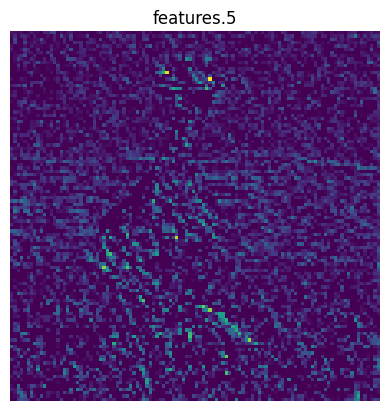

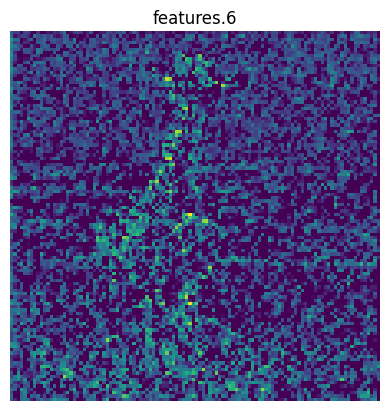

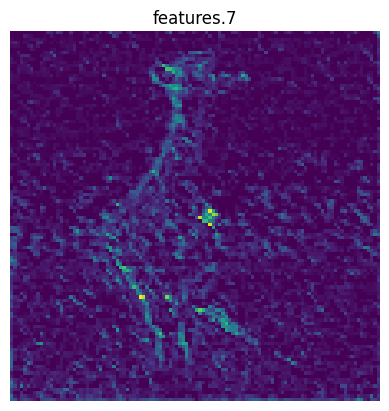

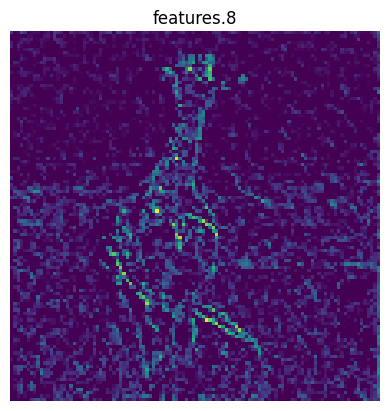

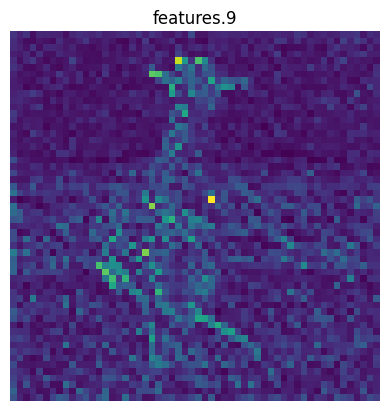

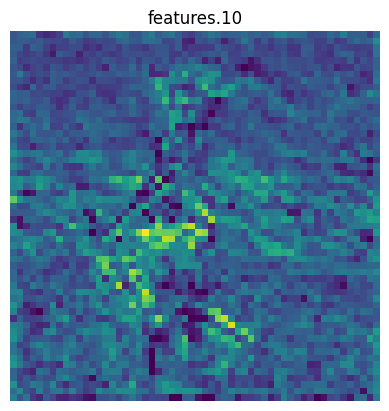

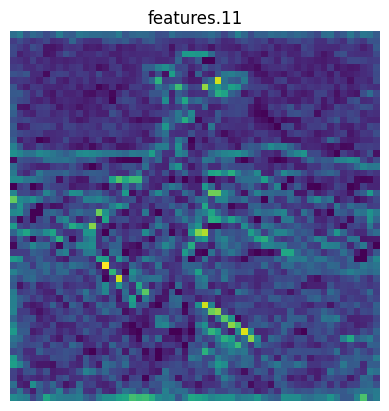

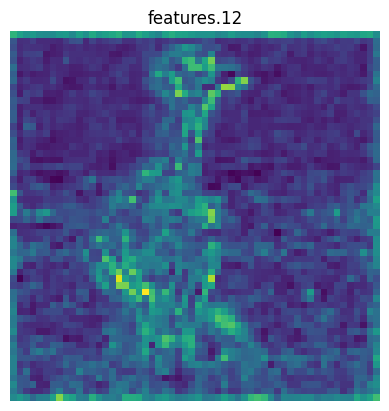

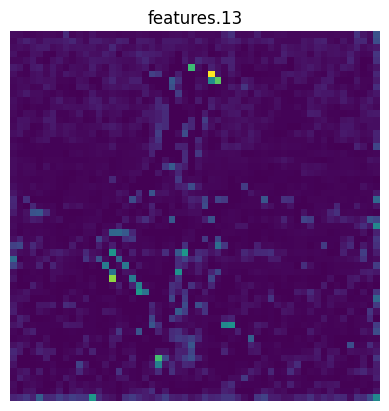

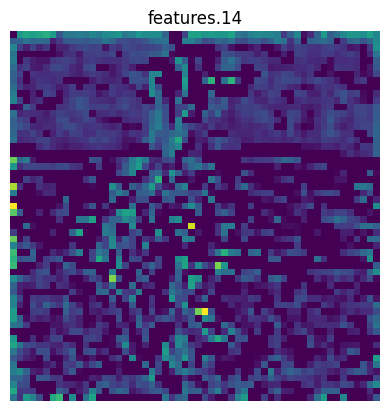

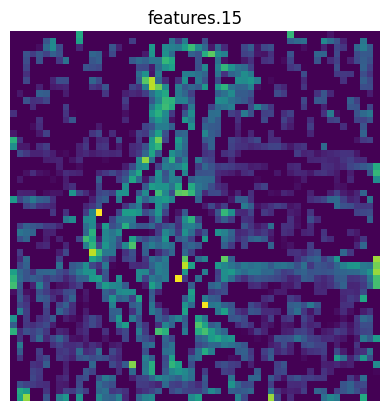

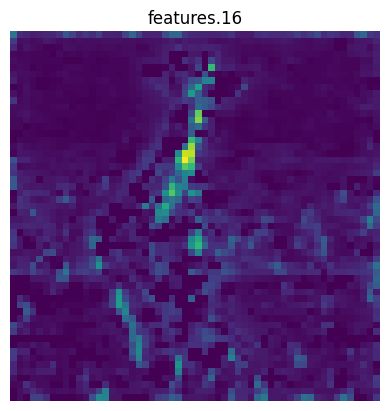

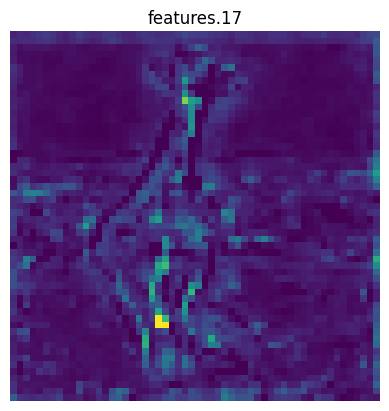

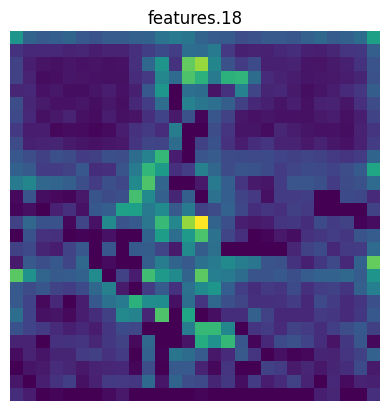

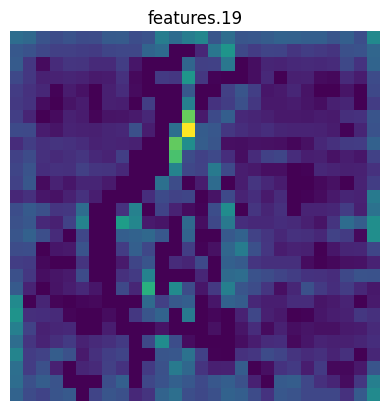

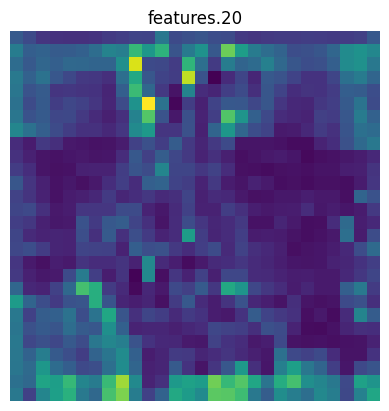

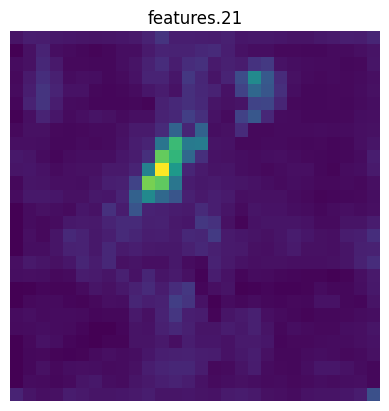

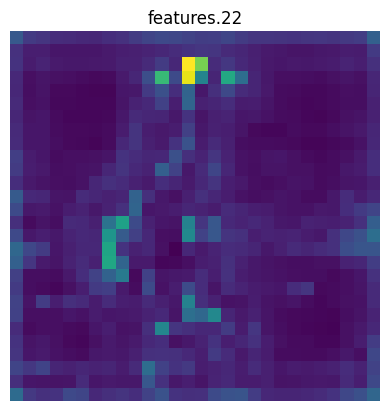

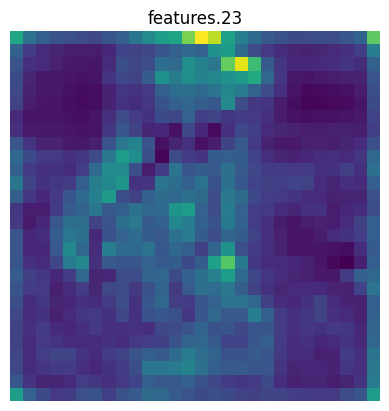

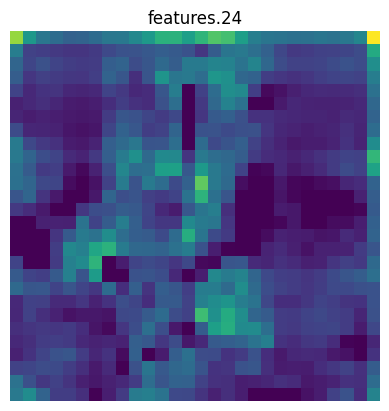

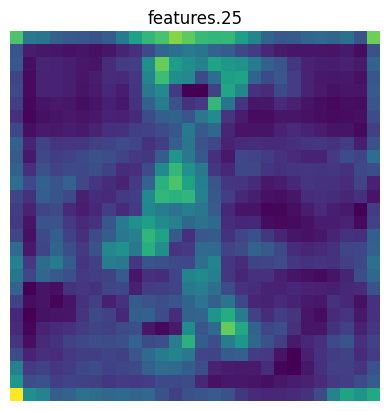

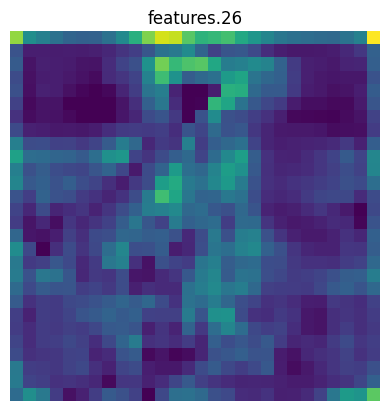

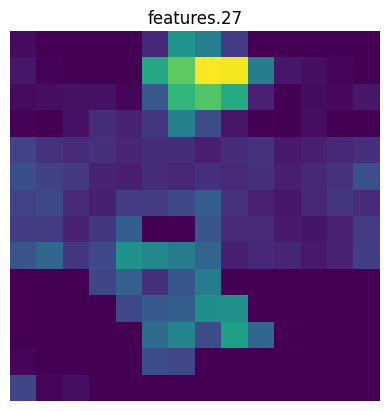

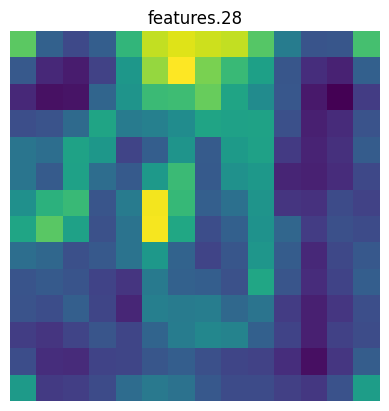

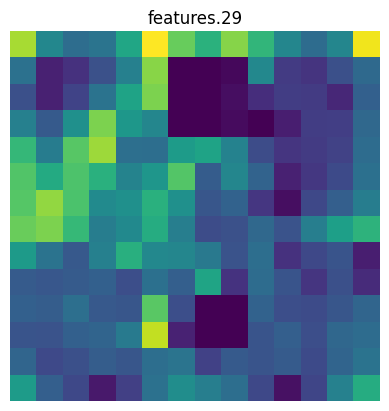

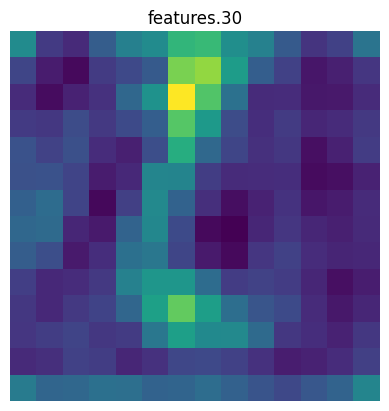

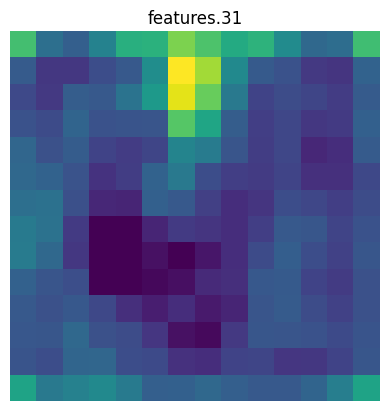

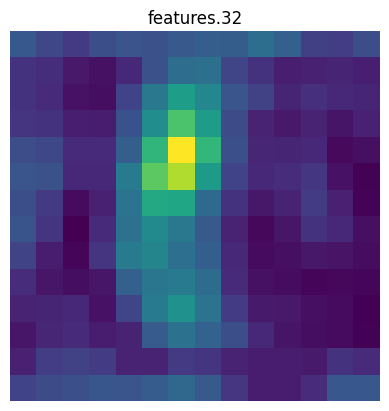

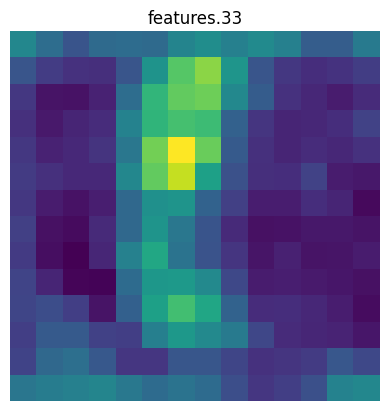

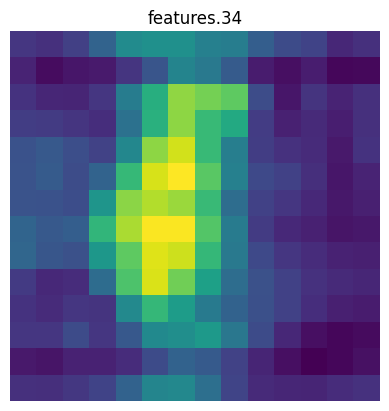

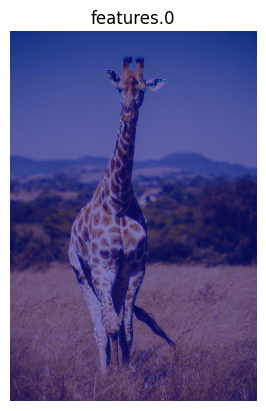

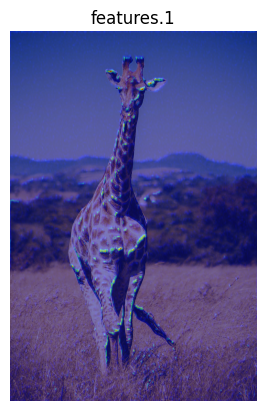

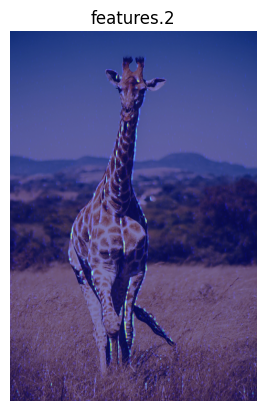

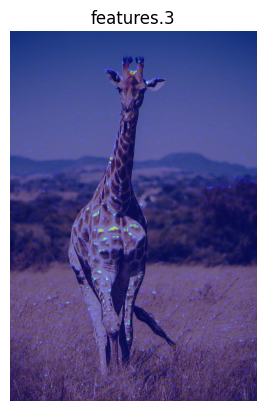

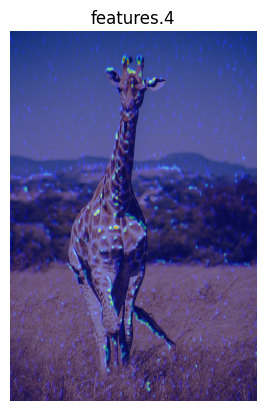

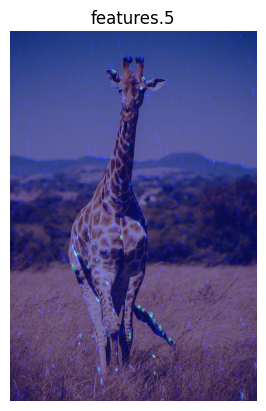

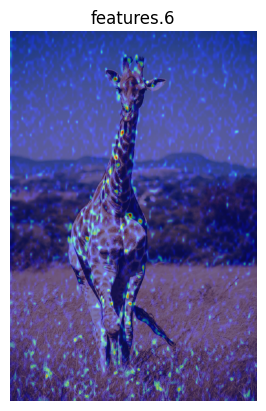

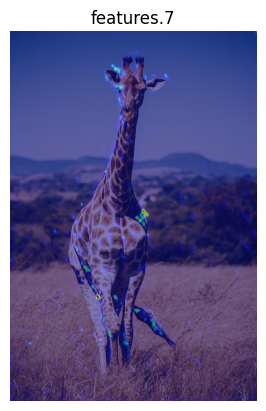

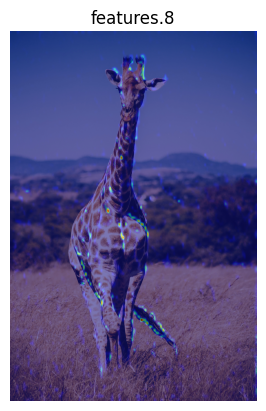

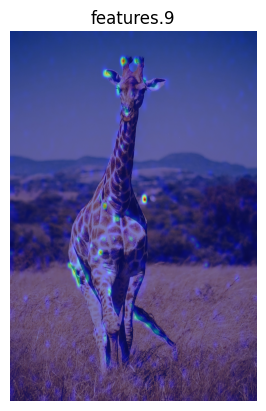

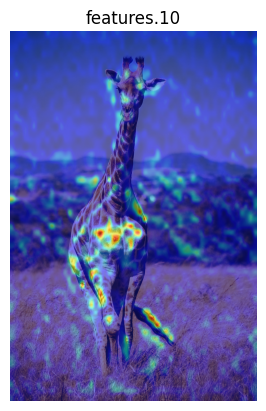

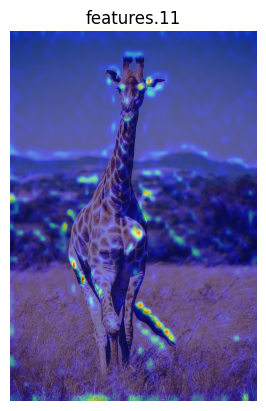

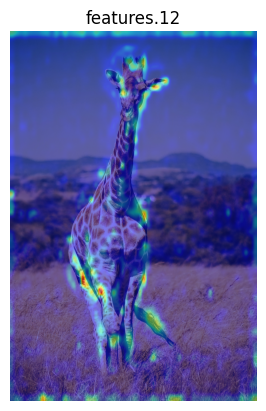

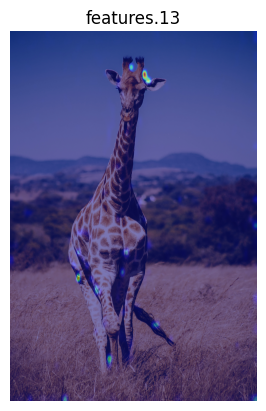

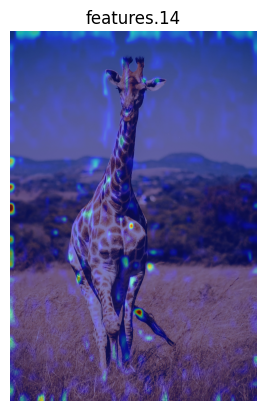

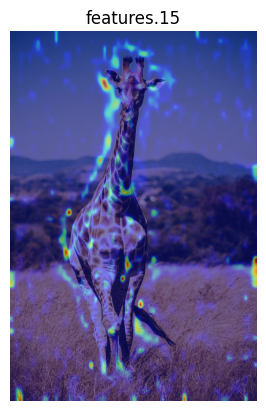

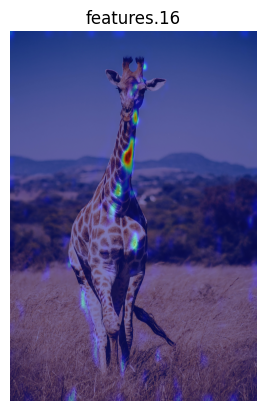

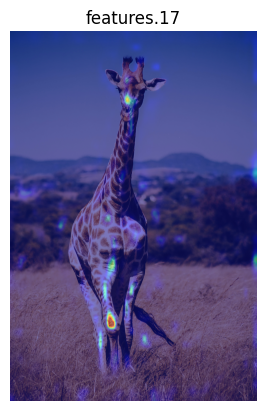

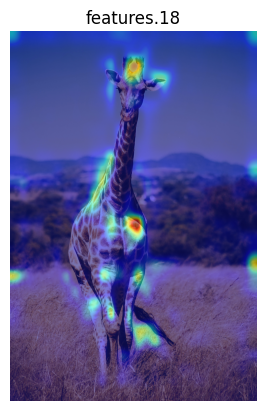

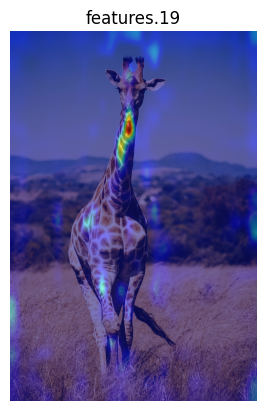

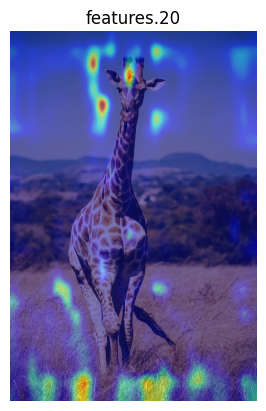

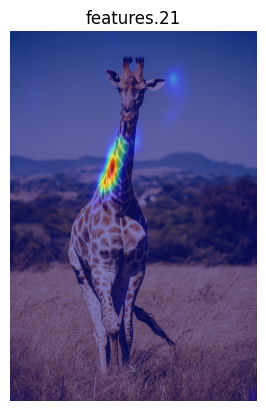

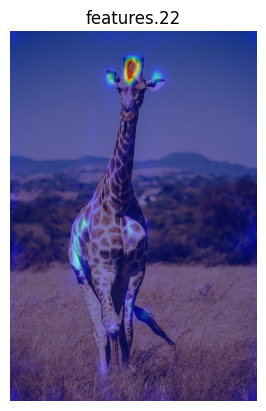

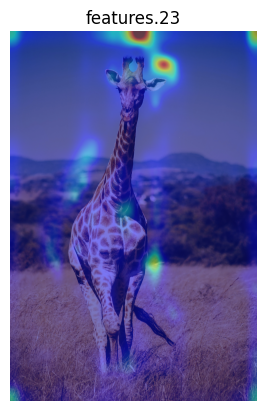

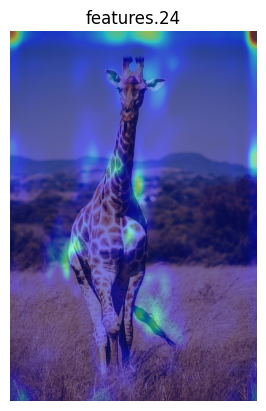

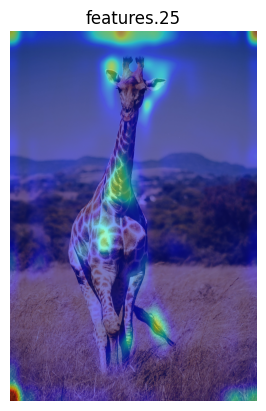

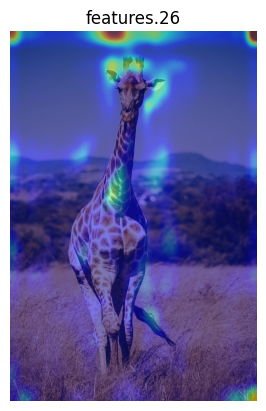

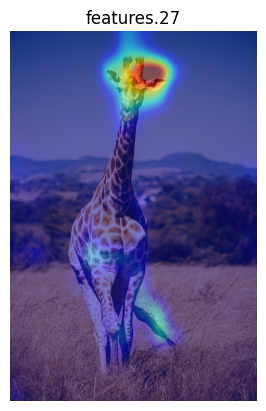

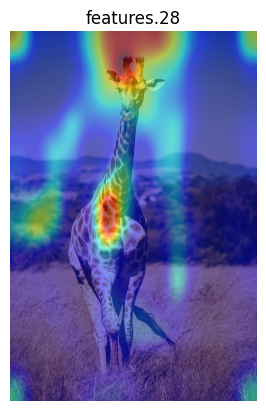

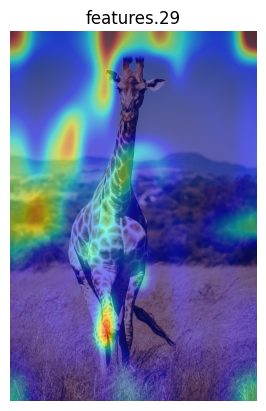

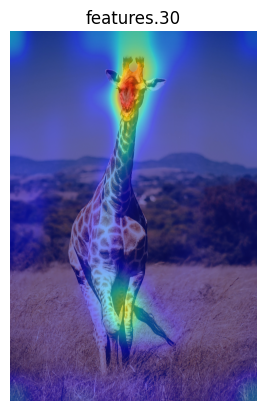

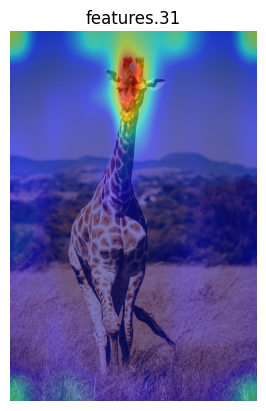

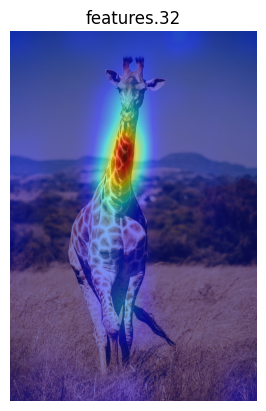

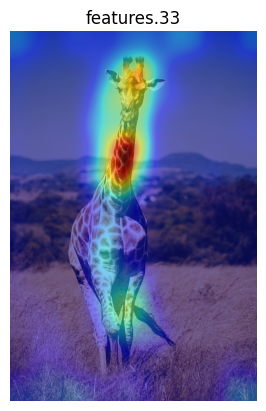

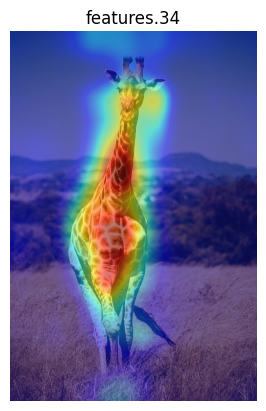

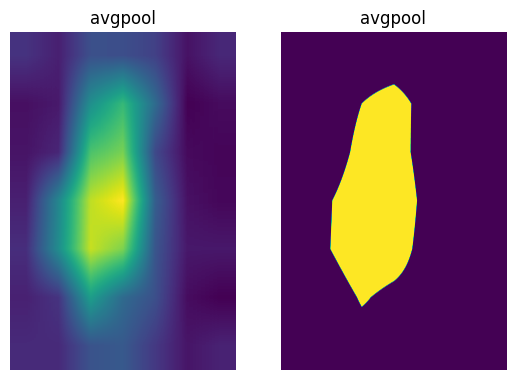

In [17]:
# Keep the features layers until the last CNN layer
features = []
features = [vgg19_model.features[x] for x in range(35)]

explainer.generate_explanation(img, input_tensor, target_layer=features)